In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier

In [2]:
df = pd.read_csv('data/stack-overflow-data.csv')

In [3]:
df = df[pd.notnull(df['tags'])]
print(df.head(10))
print(df['post'].apply(lambda x: len(x.split(' '))).sum())

                                                post           tags
0  what is causing this behavior  in our c# datet...             c#
1  have dynamic html load as if it was in an ifra...        asp.net
2  how to convert a float value in to min:sec  i ...    objective-c
3  .net framework 4 redistributable  just wonderi...           .net
4  trying to calculate and print the mean and its...         python
5  how to give alias name for my website  i have ...        asp.net
6  window.open() returns null in angularjs  it wo...      angularjs
7  identifying server timeout quickly in iphone  ...         iphone
8  unknown method key  error in rails 2.3.8 unit ...  ruby-on-rails
9  from the include  how to show and hide the con...      angularjs
10286120


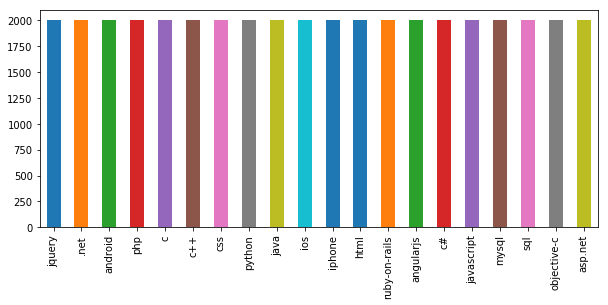

In [4]:
my_tags = ['java', 'html', 'asp.net', 'c#', 'ruby-on-rails', 'jquery', 'mysql', 'php', 'ios', 'javascript', 'python', 'c', 'css', 'android', 'iphone', 'sql', 'objective-c', 'c++', 'angularjs', '.net']
plt.figure(figsize=(10,4))
df.tags.value_counts().plot(kind='bar');

In [5]:
def print_plot(index):
    example = df[df.index == index][['post', 'tags']].values[0]
    if len(example) > 0:
        print(example[0])
        print('Tag:', example[1])
print_plot(10)

when we need interface c# <blockquote>    <strong>possible duplicate:</strong><br>   <a href= https://stackoverflow.com/questions/240152/why-would-i-want-to-use-interfaces >why would i want to use interfaces </a>   <a href= https://stackoverflow.com/questions/9451868/why-i-need-interface >why i need interface </a>    </blockquote>     i want to know where and when to use it     for example    <pre><code>interface idemo {  // function prototype  public void show(); }  // first class using the interface class myclass1 : idemo {  public void show()  {   // function body comes here   response.write( i m in myclass );  }  }  // second class using the interface class myclass2 : idemo {  public void show()   {   // function body comes here   response.write( i m in myclass2 );   response.write( so  what  );  } </code></pre>   these two classes has the same function name with different body. this can be even achieved without interface. then why we need an interface where and when to use it
Tag:

In [6]:
import re
from nltk.corpus import stopwords
import nltk
from bs4 import BeautifulSoup

REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    """
        text: a string
        
        return: modified initial string
    """
    text = BeautifulSoup(text, "html.parser").text # HTML decoding
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text
    text = BAD_SYMBOLS_RE.sub('', text) # delete symbols which are in BAD_SYMBOLS_RE from text
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # delete stopwors from text
    return text
    
df['post'] = df['post'].apply(clean_text)
print_plot(100)

error executing source code extracted executable jar file executable jar file running perfectly double clicking extracted source code jar file trying execute eclipse displaying following errors project built since build path incomplete cannot find class file controlpoint fix build path try building project type controlpoint cannot resolved indirectly referenced required class files anyone please help solving errors
Tag: java


In [7]:
df['post'].apply(lambda x: len(x.split(' '))).sum()

3424194

In [8]:
X = df.post
y = df.tags
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

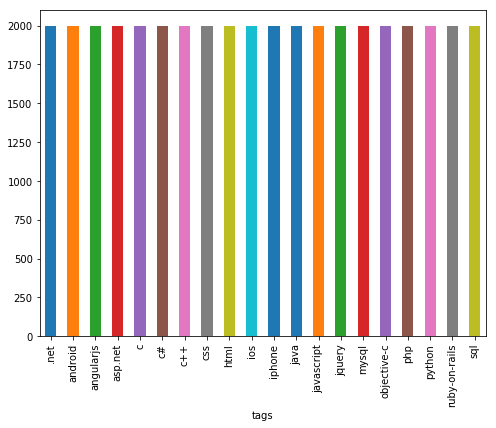

In [9]:
fig = plt.figure(figsize=(8,6))
df.groupby('tags').post.count().plot.bar(ylim=0)
plt.show()

In [10]:
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')

In [11]:
features = tfidf.fit_transform(df.post).toarray()
labels = df.tags
features.shape

(40000, 71552)

In [12]:
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

In [13]:
# Naive Bayes
print('Naive Bayes:')
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

y_pred = model.predict(count_vect.transform(X_test))
print(classification_report(y_test, y_pred, target_names=df['tags'].unique()))
print('accuracy %s' % accuracy_score(y_pred, y_test))

Naive Bayes:
               precision    recall  f1-score   support

           c#       0.64      0.61      0.63       613
      asp.net       0.94      0.83      0.88       620
  objective-c       0.87      0.91      0.89       587
         .net       0.70      0.74      0.72       586
       python       0.73      0.87      0.79       599
    angularjs       0.64      0.50      0.56       589
       iphone       0.78      0.72      0.75       594
ruby-on-rails       0.71      0.89      0.79       610
          ios       0.62      0.62      0.62       617
            c       0.58      0.63      0.60       587
          sql       0.71      0.50      0.59       611
         java       0.76      0.80      0.78       594
       jquery       0.84      0.60      0.70       619
          css       0.62      0.85      0.72       574
          c++       0.64      0.87      0.74       584
          php       0.66      0.64      0.65       578
      android       0.78      0.79      0.78       

In [14]:
# Logictic Regression
print('Logictic Regression:')
model = LogisticRegression(random_state=42)
model.fit(X_train_tfidf, y_train)

y_pred = model.predict(count_vect.transform(X_test))
print(classification_report(y_test, y_pred, target_names=df['tags'].unique()))
print('accuracy %s' % accuracy_score(y_pred, y_test))

Logictic Regression:
               precision    recall  f1-score   support

           c#       0.80      0.59      0.68       613
      asp.net       0.94      0.84      0.89       620
  objective-c       0.91      0.91      0.91       587
         .net       0.79      0.71      0.75       586
       python       0.76      0.87      0.81       599
    angularjs       0.52      0.61      0.56       589
       iphone       0.79      0.67      0.73       594
ruby-on-rails       0.81      0.88      0.84       610
          ios       0.67      0.72      0.69       617
            c       0.73      0.57      0.64       587
          sql       0.70      0.64      0.67       611
         java       0.81      0.84      0.82       594
       jquery       0.76      0.76      0.76       619
          css       0.69      0.90      0.78       574
          c++       0.79      0.87      0.83       584
          php       0.68      0.64      0.66       578
      android       0.81      0.84      0.8

In [15]:
#Linear SVM
print('Linear SVM')
model = LinearSVC()
model.fit(X_train_tfidf, y_train)

y_pred = model.predict(count_vect.transform(X_test))
print(classification_report(y_test, y_pred, target_names=df['tags'].unique()))
print('accuracy %s' % accuracy_score(y_pred, y_test))

Linear SVM
               precision    recall  f1-score   support

           c#       0.80      0.61      0.69       613
      asp.net       0.93      0.88      0.91       620
  objective-c       0.96      0.94      0.95       587
         .net       0.82      0.76      0.79       586
       python       0.78      0.86      0.81       599
    angularjs       0.55      0.64      0.59       589
       iphone       0.82      0.71      0.76       594
ruby-on-rails       0.84      0.84      0.84       610
          ios       0.67      0.74      0.70       617
            c       0.71      0.60      0.65       587
          sql       0.67      0.66      0.67       611
         java       0.80      0.84      0.82       594
       jquery       0.77      0.78      0.78       619
          css       0.74      0.91      0.81       574
          c++       0.84      0.85      0.85       584
          php       0.69      0.67      0.68       578
      android       0.81      0.86      0.84       59

In [16]:
import itertools
import os
import tensorflow as tf
from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.preprocessing import text, sequence
from keras import utils

/usr/local/Cellar/python/3.7.2_1/Frameworks/Python.framework/Versions/3.7/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.6 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.7
  return f(*args, **kwds)
Using TensorFlow backend.


In [17]:
train_size = int(len(df) * .7)
train_posts = df['post'][:train_size]
train_tags = df['tags'][:train_size]

test_posts = df['post'][train_size:]
test_tags = df['tags'][train_size:]

max_words = 1000
tokenize = text.Tokenizer(num_words=max_words, char_level=False)
tokenize.fit_on_texts(train_posts) # only fit on train

x_train = tokenize.texts_to_matrix(train_posts)
x_test = tokenize.texts_to_matrix(test_posts)

encoder = LabelEncoder()
encoder.fit(train_tags)
y_train = encoder.transform(train_tags)
y_test = encoder.transform(test_tags)

num_classes = np.max(y_train) + 1
y_train = utils.to_categorical(y_train, num_classes)
y_test = utils.to_categorical(y_test, num_classes)

batch_size = 32
epochs = 2

In [18]:
# Build the model
model = Sequential()
model.add(Dense(512, input_shape=(max_words,)))
model.add(Activation('relu'))
# model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
              
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.1)

Train on 25200 samples, validate on 2800 samples
Epoch 1/2
25200/25200 [==============================] - 6s 248us/step - loss: 0.8948 - acc: 0.7494 - val_loss: 0.6891 - val_acc: 0.7861
Epoch 2/2
25200/25200 [==============================] - 5s 201us/step - loss: 0.4987 - acc: 0.8405 - val_loss: 0.6877 - val_acc: 0.7921


In [19]:
score = model.evaluate(x_test, y_test,
                       batch_size=batch_size, verbose=1)
print('BoW with Keras')
print('Test score:', score[0])
print('Test accuracy:', score[1])

12000/12000 [==============================] - 1s 50us/step
BoW with Keras
Test score: 0.6700788624286652
Test accuracy: 0.783
